# Daten Importieren

In [1]:
import pandas as pd

In [2]:
# Datensatz der VW-Aktienkurshistorie über Pandas laden
dataset = pd.read_csv("VOW3.DE_max.csv")

In [3]:
# Die neusten 120 Einträge des Datensatzes übernehmen (optional)
#dataset = dataset.tail(120)

# Lineare Regressionsanalyse

## Imports

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import datasets, linear_model, model_selection
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np

## Datenaufbreitung (Daten konvertieren und in numpy-Arrays laden)

In [5]:
# Deklaration der zu befüllenden Arrays
stocks_X = []
stocks_Y = []

# Datenaufbereitung
for index, row in dataset.iterrows():
    # Konvertierung des Datums in passendes Format
    element = datetime.datetime.strptime(row['Date'],"%Y-%m-%d")
    timestamp = datetime.datetime.timestamp(element)
    #Abspeichern des kovertierten Datums und dem Preis in neuen Arrays
    stocks_X.append([timestamp]) 
    stocks_Y.append([row['Close']])

# Abspeichern der Daten in einem numpy-Array
stocks_X = np.array(stocks_X)
stocks_Y = np.array(stocks_Y)

# Letzte 30 Einträge zum Testen in separates Array
stocks_X_test = stocks_X[-1161:]
stocks_Y_test = stocks_Y[-1161:]

# Restliche Einträge zum Trainieren in separates Array
stocks_X_train = stocks_X[:-1161]
stocks_Y_train = stocks_Y[:-1161]

## Regression

In [6]:
# Lineares Regressions-Objekt erstellen
regr = linear_model.LinearRegression()

# Model basierend auf Trainings-Datensatz trainieren
regr.fit(stocks_X_train, stocks_Y_train)

# Vorhersagen für die Testdatensätze treffen
stocks_Y_pred = regr.predict(stocks_X_test)
stocks_Y_pred_train = regr.predict(stocks_X_train)

# Ausgabe verschiedener Parameter zur Auswertung
print('Regressionskoeffizient: \n', regr.coef_)
print('Mittlere quadratische Abweichung: %.2f'
      % mean_squared_error(stocks_Y_test, stocks_Y_pred))
print('Bestimmtheitsmaß: %.2f'
      % r2_score(stocks_Y_test, stocks_Y_pred))

Regressionskoeffizient: 
 [[2.9683311e-07]]
Mittlere quadratische Abweichung: 1849.38
Bestimmtheitsmaß: -4.90


## Plotten

### Umwandeln der Timestamps zu Datumsobjekten

In [7]:
# Umwandeln der Timestamps zu Datumsobjekten
stocks_X_train=[datetime.datetime.fromtimestamp(ts[0]) for ts in stocks_X_train]
stocks_X_test=[datetime.datetime.fromtimestamp(ts[0]) for ts in stocks_X_test]
stocks_X=[datetime.datetime.fromtimestamp(ts[0]) for ts in stocks_X]

### Plotten

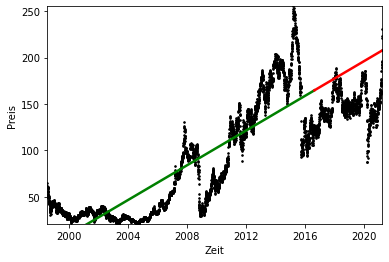

In [8]:
%matplotlib inline

# Plotten der Datenpunkte
plt.scatter(stocks_X, stocks_Y, 2.5, color='black', alpha=1)

# Plotten der Regressionsgerade der Trainingsdaten in grün
plt.plot(stocks_X_train, stocks_Y_pred_train, color='green', linewidth=2.5)

# Plotten der Vorhersage in rot
plt.plot(stocks_X_test, stocks_Y_pred, color='red', linewidth=2.5)

# Wertebereich anpassen
plt.xlim(min(stocks_X),max(stocks_X))
plt.ylim(min(stocks_Y),max(stocks_Y))

# Achsenbeschriftung
plt.ylabel("Preis")
plt.xlabel("Zeit")

# Ausgabe des Plots
plt.show()

## Evaluation

### Mittlerer absoluter Fehler

In [9]:
print("Mean squared error: %.3f" % (mean_squared_error(stocks_Y_train, stocks_Y_pred_train)))

Mean squared error: 959.436


### Mittlere quatratische Abweichung

In [10]:
print("Mean absolute error: %.3f" % (mean_absolute_error(stocks_Y_train, stocks_Y_pred_train)))

Mean absolute error: 25.832


### Bestimmtheitsmaß

In [11]:
print("R^2: %.3f" % (r2_score(stocks_Y_train, stocks_Y_pred_train)))

R^2: 0.714


### Fazit

Die lineare Regression zeigt die Tendenz der vergangenen Entwicklung des Wertpapieres. Da die Regression allerdings nur Vergangenheitsdaten fortführt, ist fraglich, ob diese Gesetzmäßigkeiten auch für die Zukunft gelten. In diesem Szenario wurde zum Beispiel die gesamte Entwicklung der Volkswagen-Aktie betrachtet und 80 % der vorliegenden Daten zur Aufstellung der Regressionsgerade verwendet, um die verbleibenden 20 % vorherzusagen. Die Tendenz stimmt in diesem Beispiel zwar mit der Vorhersage überein, dennoch liegen die meisten vorhergesagten Werte deutlich über der tatsächlichen Entwicklung.

Ein weiteres Problem von Regressionsanalysen ist, dass diese nicht in der Lage sind, grundlegende Veränderungen des Martktes, wie beispielsweise eine Disruption oder einen Konjunktureinruch, vorherzusagen.